In [1]:
import logging
import sys
import json
import datetime

import matplotlib.pyplot as plt
import pandas as pd

import iperf_tools as ipt
import coordinator

In [2]:
EXAMPLE_CONFIG_ONE_CLIENT = {
    "clients": [
        {
            "id": "1",
            "port": "5001",
            "interval": "0.5",
            "host": "192.168.1.129",
            "delay": "5",
            "tos": "0",
            "iperf_timeout": 30,
        },
    ]
}
EXAMPLE_CONFIG_TWO_CLIENTS = {
    "clients": [
        {
            "id": "1",
            "port": "5001",
            "interval": "0.25",
            "host": "192.168.1.129",
            "delay": "60",
            "tos": "0x08",
            "iperf_timeout": 180,
        },
        {
            "id": "2",
            "port": "5002",
            "interval": "0.25",
            "host": "192.168.1.129",
            "delay": "60",
            "tos": "0x08",
            "iperf_timeout": 180,
        }
    ]
}

In [3]:
def start_client_tools(id, port, interval, host, delay, tos, iperf_timeout):
    results = [""]
    ipt.start_client(id, results, port, interval, host, delay, tos, iperf_timeout)
    return results[0]

def generate_single_client():
    co = coordinator.Coordinator(0, EXAMPLE_CONFIG_ONE_CLIENT)
    return co._generate_clients()


def start_two_clients():
    co = coordinator.Coordinator(0, EXAMPLE_CONFIG_TWO_CLIENTS)
    return co.run_experiment()

In [5]:
csv_tag = input("csv tag: ")
time_string = datetime.datetime.now().strftime("%d_%m_%y %H_%M_%S")
sqm_results = start_two_clients()

csv tag:  testing1


Len results: 2


In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
l1 = ax.plot(results[0]["start_time"],results[0]["bits_per_second"],'ys-') # solid line with yellow colour and square marker
l2 = ax.plot(results[1]["start_time"],results[1]["bits_per_second"],'go--') # dash line with green colour and circle marker
ax.legend(labels = ('Client 1', 'Client 2'), loc = 'upper left') # legend placed at lower right
ax.set_title("Bitrate and Measurement Duration Over Time")
ax.set_xlabel('Time (s)')
ax.set_ylabel('Bitrate')
plt.show()

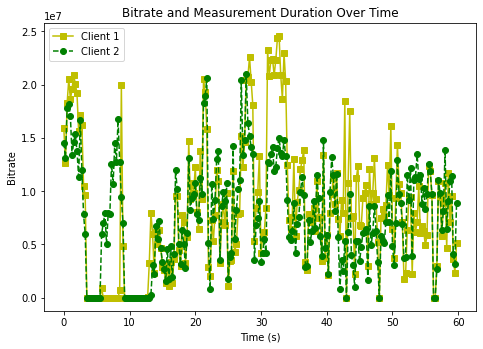

In [6]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
l1 = ax.plot(sqm_results[0]["start_time"],sqm_results[0]["bits_per_second"],'ys-') # solid line with yellow colour and square marker
l2 = ax.plot(sqm_results[1]["start_time"],sqm_results[1]["bits_per_second"],'go--') # dash line with green colour and circle marker
ax.legend(labels = ('Client 1', 'Client 2'), loc = 'upper left') # legend placed at lower right
ax.set_title("Bitrate and Measurement Duration Over Time")
ax.set_xlabel('Time (s)')
ax.set_ylabel('Bitrate')
plt.show()

In [ ]:
results[0].to_csv(f"csvdump/{time_string}client_1_nosqm.csv")
results[1].to_csv(f"csvdump/{time_string}client_2_nosqm.csv")

In [ ]:
sqm_results[0].to_csv(f"csvdump/{time_string}_client_1_sqm.csv")
sqm_results[1].to_csv(f"csvdump/{time_string}_client_2_sqm.csv")

In [22]:
file_name = "blank"
files = []
i = 1
while True:
    file_name = input(f"Enter file name #{i}:")
    if file_name == "":
        break
    files.append(file_name)
    i = i + 1

Enter file name #1: sensor_csvdump/25_10_21 17_02_57_testing2.csv
Enter file name #2: sensor_csvdump/25_10_21 17_03_08_testing1.csv
Enter file name #3: 


In [23]:
dfs = []
for f in files:
    dfs.append(pd.read_csv(f))    

Field to plot:  bits_per_second


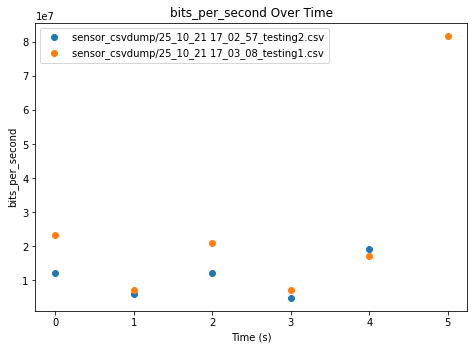

In [25]:
field = input("Field to plot: ")
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
for df in dfs:
    ax.scatter(df["start_time"], df[field])
ax.legend(labels = files, loc = 'upper left') # legend placed at lower right
ax.set_title(f"{field} Over Time")
ax.set_xlabel('Time (s)')
ax.set_ylabel(f'{field}')
plt.show()